In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Exploration Data

In [4]:
df = pd.read_csv('cancer_patient.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.shape

(1000, 26)

In [6]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

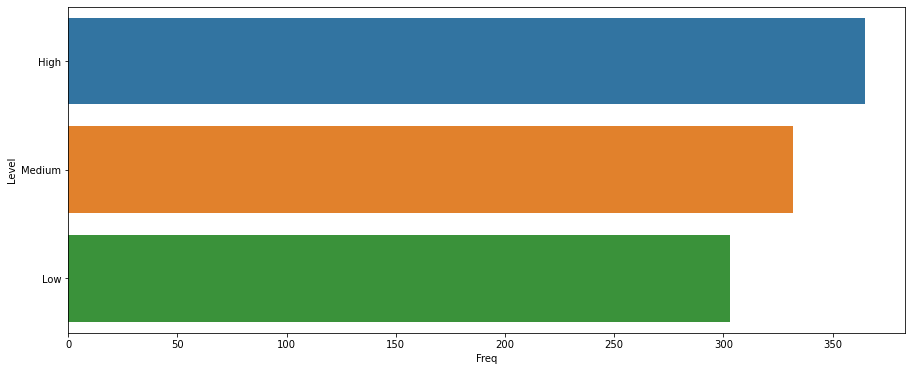

In [9]:
plt.figure(figsize = (15,6))
sns.countplot(y='Level', data = df, order=df['Level'].value_counts(ascending=False).index)
plt.xlabel('Freq')
plt.ylabel('Level')
plt.show()

### Classification is not balance so we have to use random under sampling

In [10]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [67]:
x = df.drop(['index','Patient Id','Level'], axis = 1).copy()
y = df['Level'].copy()

In [68]:
rus = RandomUnderSampler(random_state = 0)
x_rus, y_rus = rus.fit_resample(x,y)

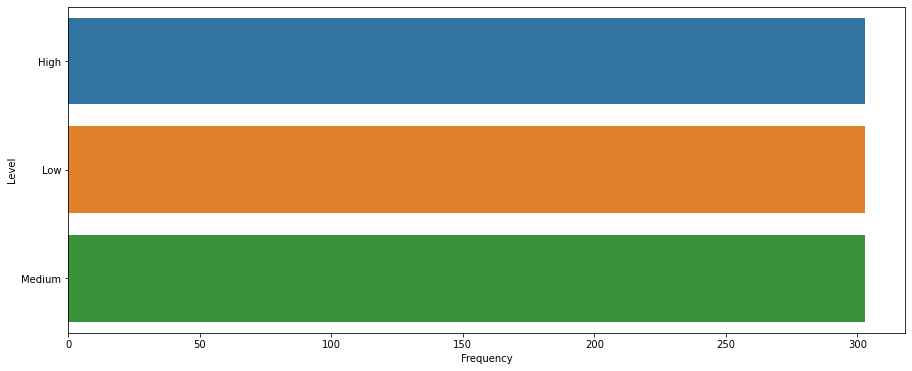

In [69]:
plt.figure(figsize = (15,6))
sns.countplot(y = y_rus)
plt.xlabel('Frequency')
plt.ylabel('Level')
plt.show()

# Data Visualization

In [24]:
df_rus = x_rus.copy()
#df_rus['Level'] = y_rus

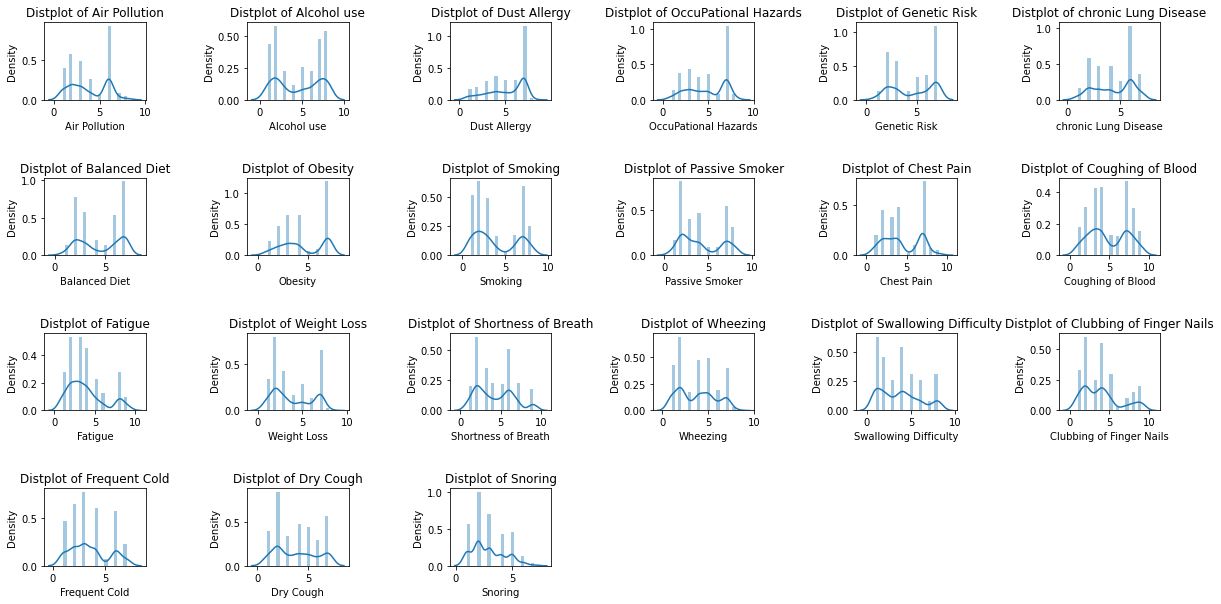

In [27]:
plt.figure(figsize=(20,10))
n = 0
for x in list(df_rus.iloc[:,2:]):
    n += 1 
    plt.subplot(4,6,n)
    plt.subplots_adjust(hspace = 1, wspace = 1)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

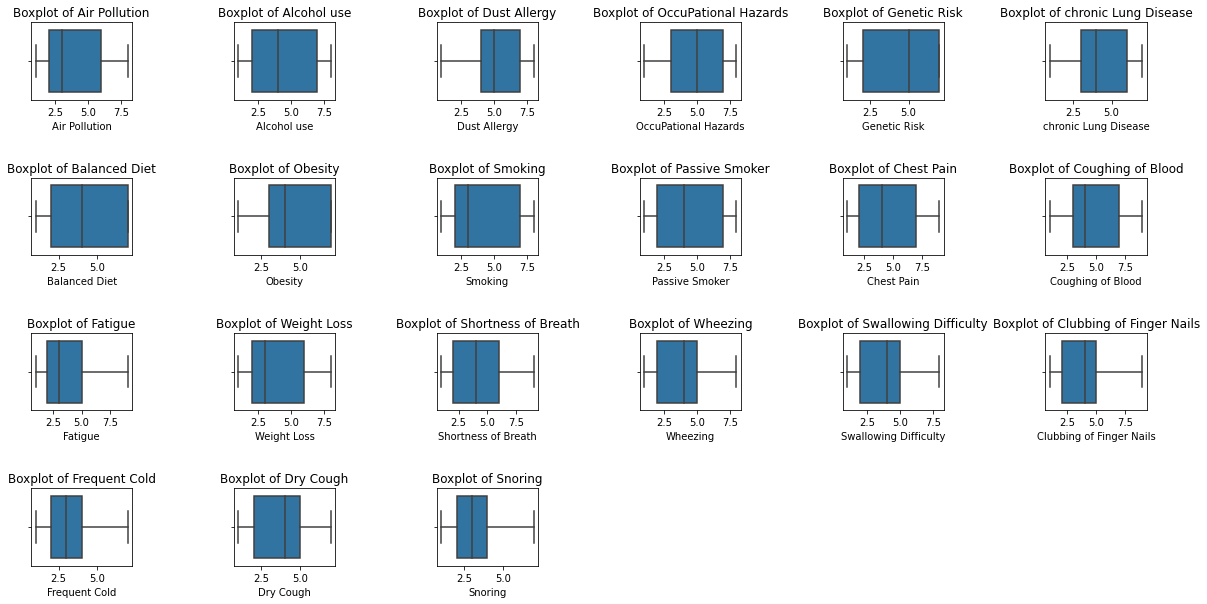

In [30]:
plt.figure(figsize=(20,10))
n = 0
for x in list(df_rus.iloc[:,2:]):
    n += 1 
    plt.subplot(4,6,n)
    plt.subplots_adjust(hspace = 1, wspace = 1)
    sns.boxplot(data = df_rus, x = x)
    plt.title('Boxplot of {}'.format(x))
plt.show()

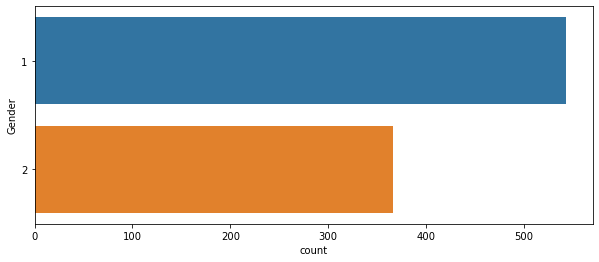

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_rus, y = 'Gender', order = df_rus['Gender'].value_counts(ascending=False).index)
plt.show()

Correlation between variable

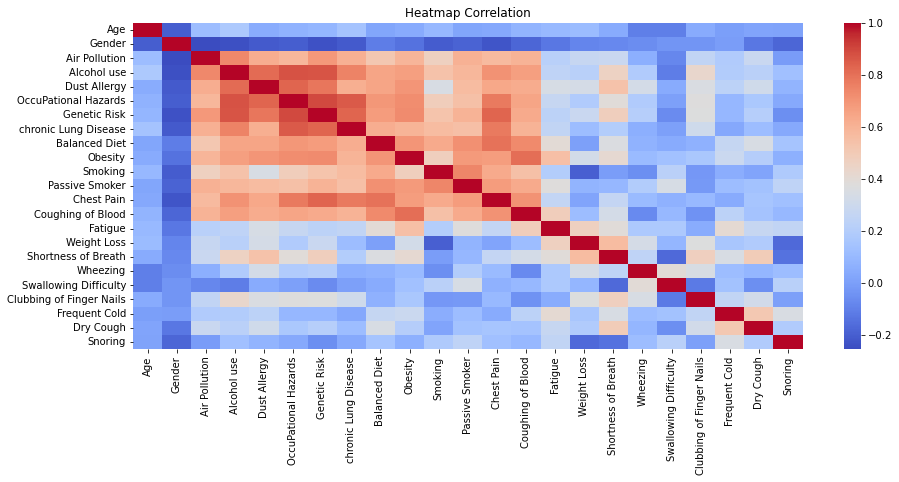

In [36]:
df_rus_corr = df_rus.corr()

plt.figure(figsize=(15,6))
sns.heatmap(df_rus_corr, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

There's strong correlation between feature air pollution and coughing blood

# Data Split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, random_state = 42, test_size = 0.2)

In [71]:
len(x_train)

727

In [73]:
len(x_test)

182

In [85]:
model = SVC(kernel = 'linear', C=10, gamma=1)

In [86]:
model.fit(x_train, y_train)

SVC(C=10, gamma=1, kernel='linear')

In [87]:
model.score(x_test, y_test)

1.0

# Testing The Model

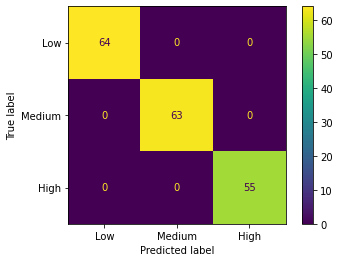

In [84]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low','Medium','High'])
disp.plot()

In [93]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average = 'macro')
recall = recall_score(y_test, y_predicted, average = 'macro')
f1 = f1_score(y_test, y_predicted,  average = 'macro')
print('Accuracy is {}'.format(accuracy))
print('Precision is {}'.format(precision))
print('Recall is {}'.format(recall))
print('F1 Score is {}'.format(f1))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0
